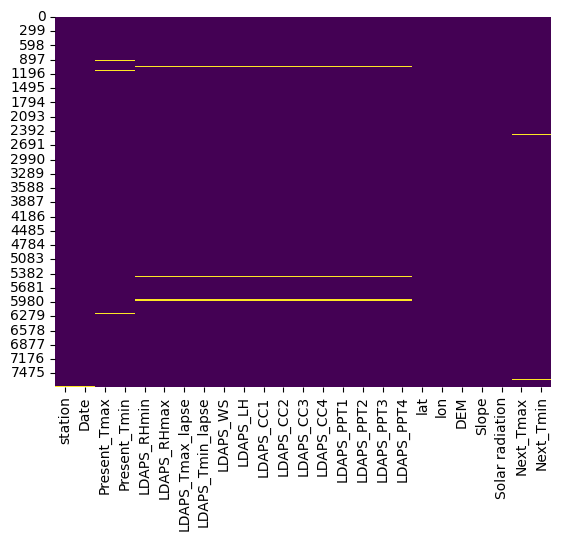

Cross-Validation Score for Linear Regression (Next_Tmin): -1.1229851058663145
Mean Squared Error for Linear Regression (Next_Tmin): 0.9644785082807352


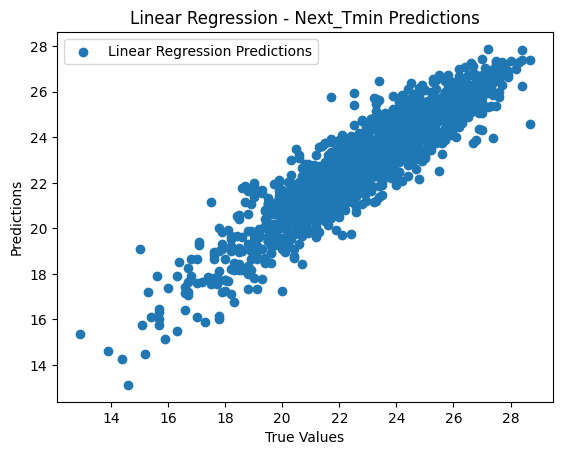

Cross-Validation Score for Linear Regression (Next_Tmax): -2.6867906922543376
Mean Squared Error for Linear Regression (Next_Tmax): 2.258657268709394


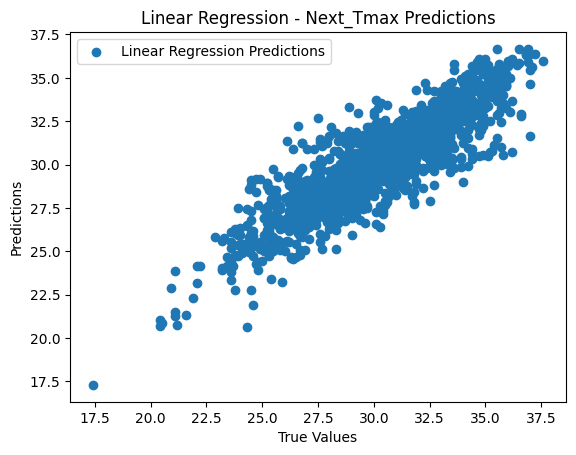

Cross-Validation Score for HistGradientBoosting (Next_Tmin): -1.0749691278772189
Mean Squared Error for HistGradientBoosting (Next_Tmin): 0.42698754631507724


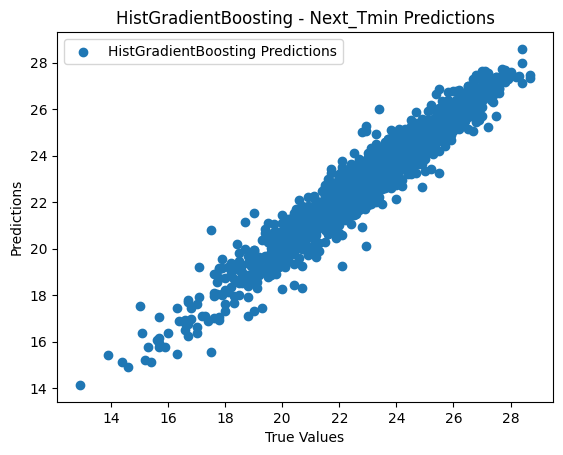

Cross-Validation Score for HistGradientBoosting (Next_Tmax): -2.810749224392359
Mean Squared Error for HistGradientBoosting (Next_Tmax): 0.7570826884403622


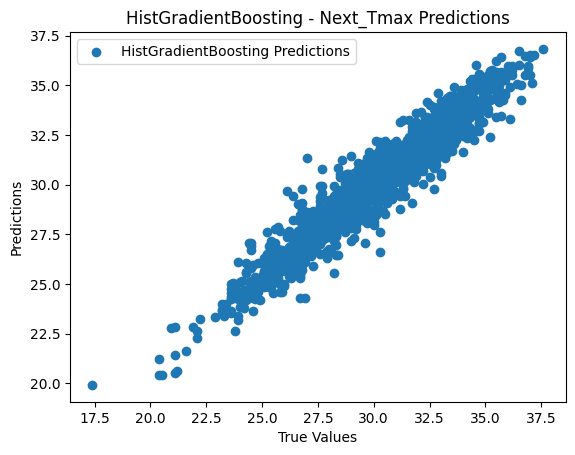

Best Parameters for HistGradientBoostingRegressor (Next_Tmin): {'learning_rate': 0.1, 'max_depth': None, 'max_iter': 100, 'min_samples_leaf': 1}


['best_model_next_tmin.joblib']

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the dataset
url = "https://github.com/dsrscientist/Dataset2/raw/main/temperature.csv"
df = pd.read_csv(url)

# Check for missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# Preprocessing and Feature Engineering
# Drop unnecessary columns
df = df.drop(['Date'], axis=1)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and target variables
X_min = df_imputed.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_min = df_imputed['Next_Tmin']

X_max = df_imputed.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = df_imputed['Next_Tmax']

# Split the data into training and testing sets
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_min, y_min, test_size=0.2, random_state=42)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_max, y_max, test_size=0.2, random_state=42)

# Build models
models = {
    'Linear Regression': LinearRegression(),
    'HistGradientBoosting': HistGradientBoostingRegressor()
}

# Evaluate models
for name, model in models.items():
    # Cross-validation
    cv_score = cross_val_score(model, X_min, y_min, cv=5, scoring='neg_mean_squared_error')
    print(f'Cross-Validation Score for {name} (Next_Tmin): {np.mean(cv_score)}')

    # Train and test the model for Next_Tmin
    model.fit(X_train_min, y_train_min)
    pred_min = model.predict(X_test_min)
    mse_min = mean_squared_error(y_test_min, pred_min)
    print(f'Mean Squared Error for {name} (Next_Tmin): {mse_min}')

    # Visualize predictions
    plt.scatter(y_test_min, pred_min, label=f'{name} Predictions')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{name} - Next_Tmin Predictions')
    plt.legend()
    plt.show()

    # Cross-validation for Next_Tmax
    cv_score = cross_val_score(model, X_max, y_max, cv=5, scoring='neg_mean_squared_error')
    print(f'Cross-Validation Score for {name} (Next_Tmax): {np.mean(cv_score)}')

    # Train and test the model for Next_Tmax
    model.fit(X_train_max, y_train_max)
    pred_max = model.predict(X_test_max)
    mse_max = mean_squared_error(y_test_max, pred_max)
    print(f'Mean Squared Error for {name} (Next_Tmax): {mse_max}')

    # Visualize predictions
    plt.scatter(y_test_max, pred_max, label=f'{name} Predictions')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{name} - Next_Tmax Predictions')
    plt.legend()
    plt.show()

# Hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
    # Add other parameters based on your model
}

rf_model = HistGradientBoostingRegressor()
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_min, y_min)
print(f'Best Parameters for HistGradientBoostingRegressor (Next_Tmin): {grid_search.best_params_}')

# Save the best model
final_model = grid_search.best_estimator_

# Save the model using joblib or pickle
import joblib
joblib.dump(final_model, 'best_model_next_tmin.joblib')

# Explanation for selecting the final model
# You can use various criteria such as cross-validation scores, mean squared errors, and domain knowledge

# Documentation
# Write down your findings, insights, and steps taken in the Jupyter Notebook

# Optionally, you can create visualizations or tables to summarize your results
